In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import DATAFILE_NAMES, TARGET_FEATURE, FIGSIZE, FIGSIZE_NARROW, N_JOBS, RANDOM_SEED, load_all, target_split
from features import *
from models import *
from solutions import *

In [4]:
%%time
m = SolutionMain1(40)
m.get_solution()
y = m.last_solution

eq init


  0%|          | 0/37 [00:00<?, ?it/s]

Wall time: 2min 56s


In [21]:
print(f"Всего режимов: {len(y.unique())}")
print(f"Всего нестационарных режимов: {len(y[m.transient == 1].unique())}")
print(f"Количество срабатываний: {sum(y.diff() != 0)}")

Всего режимов: 19
Всего нестационарных режимов: 15
Количество срабатываний: 321


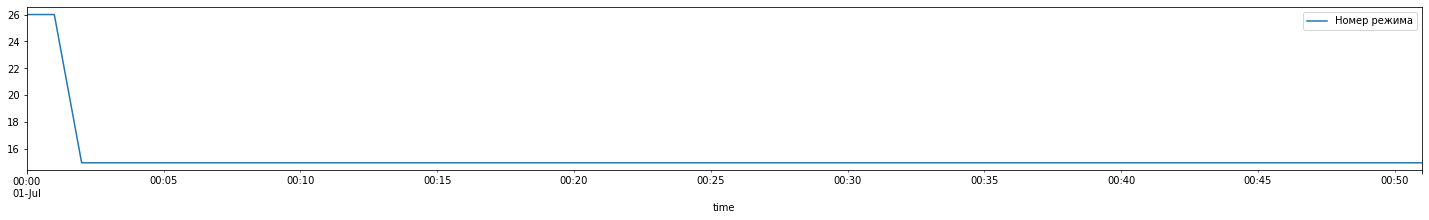

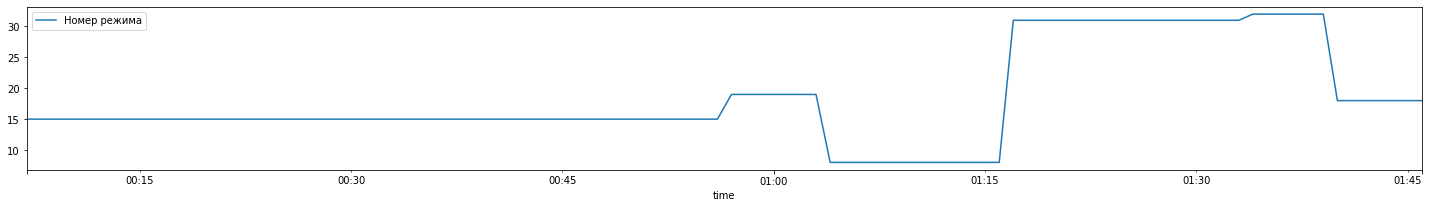

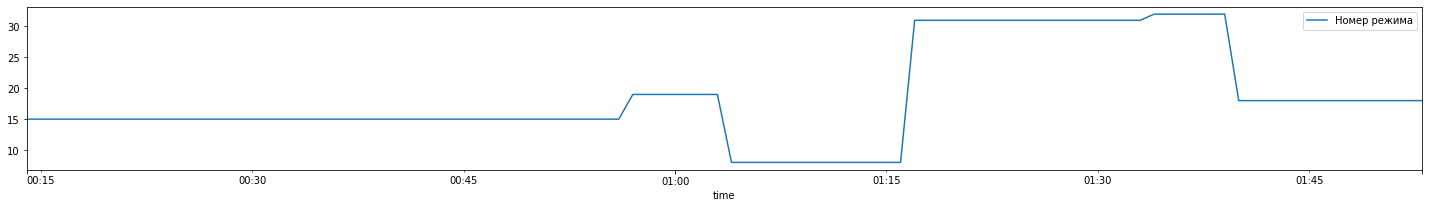

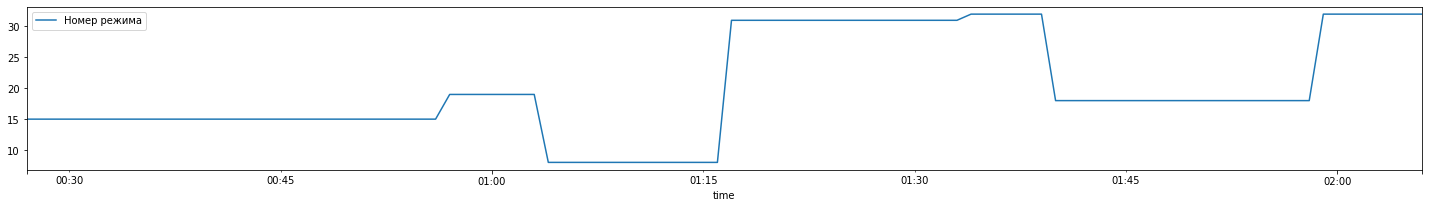

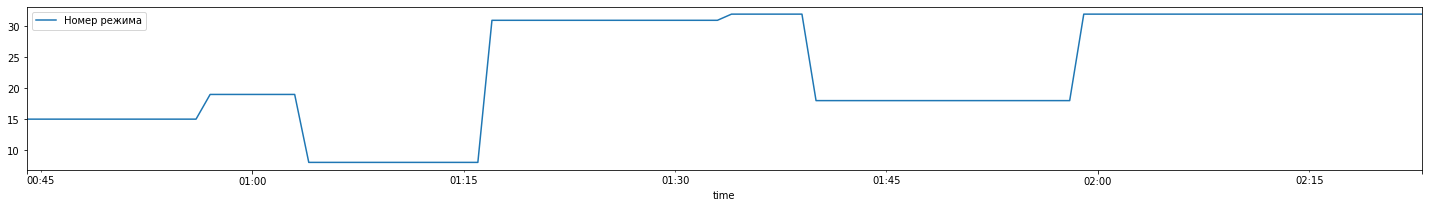

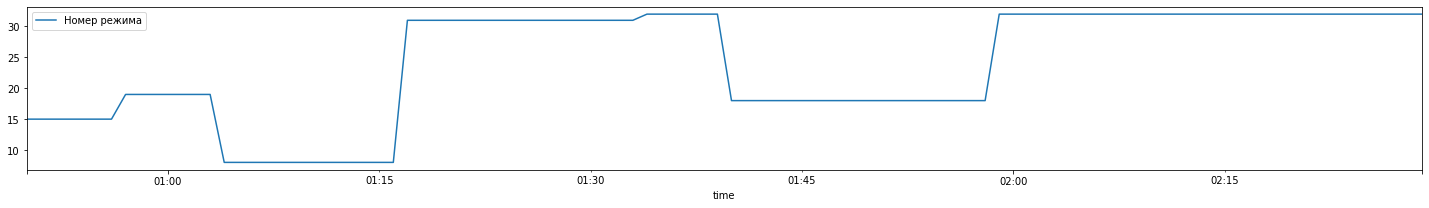

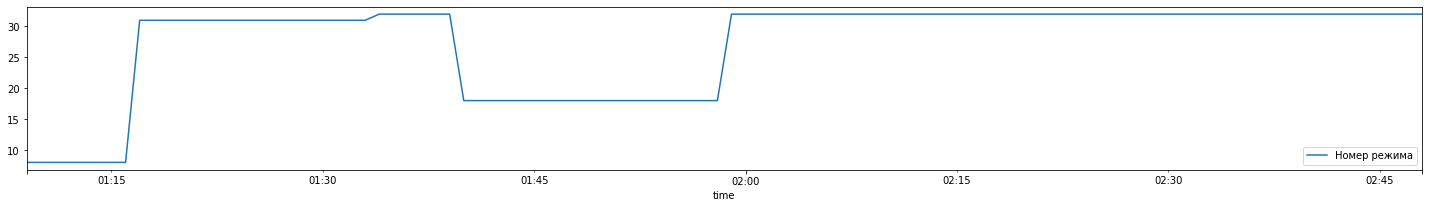

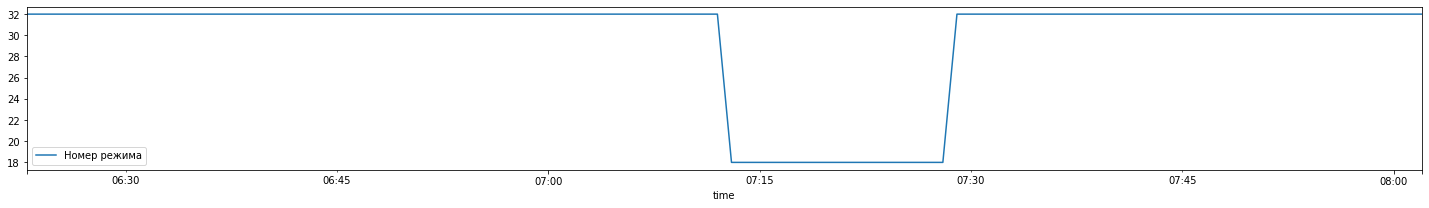

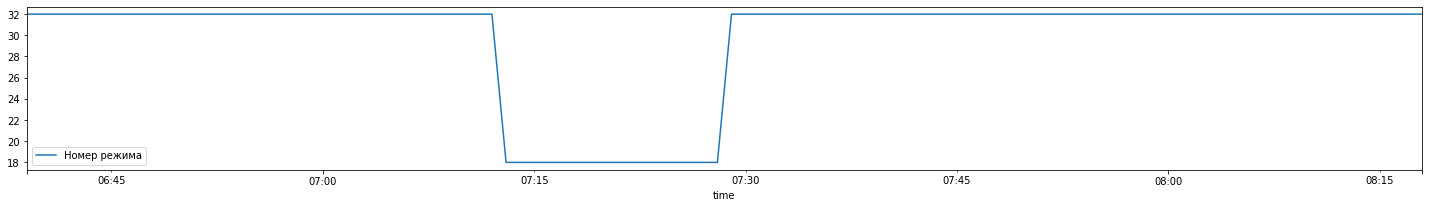

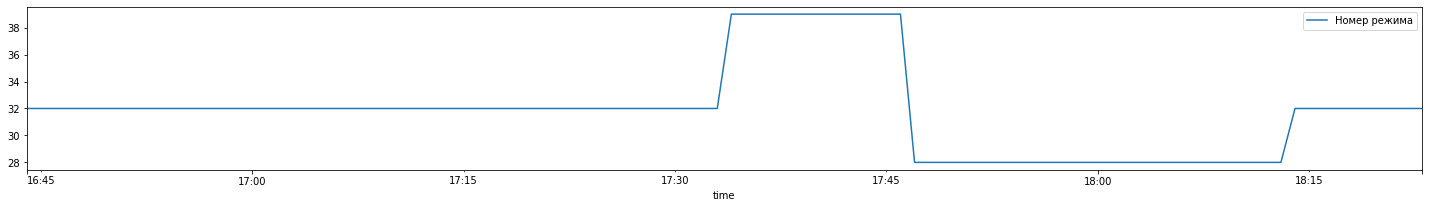

In [47]:
delta = 50
dy = y.diff().dropna()
dy = dy[dy != 0]
t = t_min_max(m.transient) * max(y)
for i in range(10): 
    n = np.argmax(y.index == dy.index[i])
    
    _, ax = plt.subplots(figsize=FIGSIZE_NARROW)
    y.iloc[max(n - delta, 0):min(n + delta, y.shape[0])].plot(ax=ax, label='Номер режима')
    ax.legend()